In [1]:
import sys
# # sys.setrecursionlimit(10000)
import os
sys.path.append( os.getcwd() )
os.chdir('..')
from tqdm import tqdm

In [2]:
from time import time
import numpy as np
from Tree.tree_builder import tree_builder
from Tree.tree_values import TreeValues
from Tree.tree_visualizer import tree_visualizer
from Tree.tree_cfr import TreeCFR
from helper_classes import TreeParams, Node
from Game.card_to_string_conversion import card_to_string
from Game.card_tools import card_tools
from Game.card_combinations import card_combinations
from Settings.constants import constants
from Settings.arguments import arguments
from NeuralNetwork.value_nn import ValueNn
from NeuralNetwork.metrics import BasicHuberLoss
from TerminalEquity.terminal_equity import TerminalEquity
from TerminalEquity.evaluator import evaluator
from Lookahead.resolving import Resolving
from DataGeneration.range_generator import RangeGenerator
from Player.continual_resolving import ContinualResolving

In [3]:
PC = constants.players_count
CC = constants.card_count
HC = constants.hand_count
P1 = constants.players.P1
P2 = constants.players.P2
sb = arguments.sb
bb = arguments.bb

In [4]:
%load_ext line_profiler
def asd(boards):
    for board in boards:
        card_tools.get_possible_hand_indexes(board)
boards = card_tools.get_next_round_boards(card_to_string.string_to_board(''))
# %lprun -f card_tools.get_possible_hand_indexes asd(boards)
# %timeit asd(boards)

In [5]:
# %timeit card_tools.get_next_round_boards(card_to_string.string_to_board('2c3c4c'))

In [6]:
# nn = ValueNn(3, approximate='root_nodes', pretrained_weights=True, verbose=0)

In [7]:
# b = 10000
# x = np.random.rand(b,1326*2+1+69)
# from time import time
# t = time()
# for j in range(10):
#     nn.keras_model.predict(x, batch_size=1000)
# print(time()-t)

In [8]:
# ranges = np.load('test_ranges/river_nl.npy')
# player_range = ranges[0].reshape([1,-1])
# opponent_range = ranges[1].reshape([1,-1])
player_range = np.full([1,HC], 1/HC, dtype=arguments.dtype)
opponent_range = np.full([1,HC], 1/HC, dtype=arguments.dtype)

current_node = Node()
current_node.board = card_to_string.string_to_board('')
current_node.street = 1
current_node.current_player = constants.players.P2
current_node.bets = np.array([20000, 100], dtype=arguments.dtype)
current_node.num_bets = 0

te = TerminalEquity()
te.set_board(current_node.board)

# range_generator = RangeGenerator()
# range_generator.set_board(te, current_node.board)
# player_range = np.zeros([1,1326])
# range_generator.generate_range(player_range)
# opponent_range = np.zeros([1,1326])
# range_generator.generate_range(opponent_range)

resolving = Resolving(te, verbose=1)

river_results = resolving.resolve(current_node, player_range, opponent_range) 

Build time: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 679.12it/s]


Resolve time: 1.4724974632263184
printing batch: 0
root_cfvs - (1, 1326)
[ 5649.93  5649.93  6285.92 12982.95 12982.95 12982.95]
root_cfvs_both_players - (1, 2, 1326)
[ 5649.93  5649.93  6285.92 12982.95 12982.95 12982.95]
[2687.57 2687.57 2959.6  6020.6  6020.6  6020.6 ]
achieved_cfvs - (1, 2, 1326)
[2687.57 2687.57 2959.6  6020.6  6020.6  6020.6 ]
[ 5649.93  5649.93  6285.92 12982.95 12982.95 12982.95]
strategy - (2, 1, 1326)
[[0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1.]]


In [10]:

s = river_results.strategy[:,0,:]
j = 8
for i in range(10):
    start_idx = 14*i + 140*j
    x = 14
    print()
    print(np.array2string(s[:,start_idx:start_idx+x], suppress_small=True, precision=2))


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [8]:
import pickle

def store_resolve_results(bets, results):
        results_dir = os.path.join(arguments.cache_path, '{}_{}'.format(bets[0], bets[1]))
        # create dir
        # store everything in pickle file except next_street_cfvs store seperately
#         np.save(os.path.join(results_dir, 'next_street_cfvs'), results.next_street_cfvs)
        results.next_street_cfvs = None
        pickle.dump(results, open(os.path.join(results_dir, 'results.pkl'), 'wb'))

store_resolve_results([arguments.sb, arguments.bb], river_results)

In [7]:
a = np.load('./Data/cache/50_100/next_street_cfvs.npy')
a.shape

(5, 22100, 2, 1326)

In [16]:
b = s[3,:]
a = np.zeros_like(b)
a[b>9e-1] = 1
a.sum()

28.0

In [9]:
river_results.actions

array([   -2,    -1,   300, 20000], dtype=int16)

In [11]:
a = river_results.next_street_cfvs[0,0]
x1 = 1340/8000
x2 = 1360/8000
b = np.ones_like(a)
b[a < x1] = 0
b[a > x2] = 0
b.sum()

1200.0

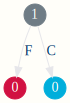

In [7]:
tree_visualizer.draw_tree( resolving.lookahead_tree )

In [14]:
print( resolving.lookahead.action_to_index)

{-1: 0, 300: 1, 20000: 2}{-1: 0, 300: 1, 20000: 2}



In [ ]:
next_boards = card_tools.get_next_round_boards(np.zeros([]))
BC = next_boards.shape[0]
next_boards_features = np.zeros([BC, 69], dtype=arguments.dtype)
from tqdm import tqdm
for i, next_board in enumerate(tqdm(next_boards)):
    next_boards_features[i] = card_tools.convert_board_to_nn_feature(next_board)

In [ ]:
next_boards

In [15]:
deepstack = ContinualResolving()

TypeError: exists() got an unexpected keyword argument 'bets'

In [ ]:
deepstack.starting_cfvs_as_P2

In [ ]:
deepstack.start_new_hand('Ac','Ah',player_is_small_blind=True)

In [ ]:
# deepstack.compute_action('', player_bet=50, opponent_bet=100)

In [ ]:
card_combinations.choose(52-4,1)

In [ ]:
card_tools.get_last_round_boards(card_to_string.string_to_board('2c3c4c')).shape